In [235]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [244]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.) 
# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
df = pd.read_csv("fcc-forum-pageviews.csv", index_col='date', parse_dates=['date'])

In [245]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [246]:
# Clean data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

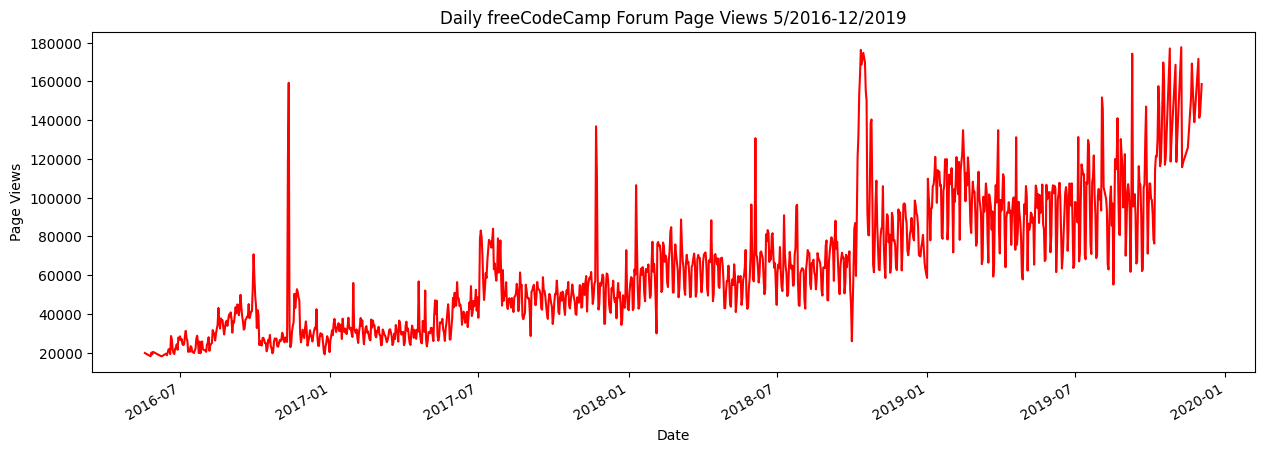

In [247]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
# The label on the x axis should be Date and the label on the y axis should be Page Views.
def draw_line_plot():
    # Draw line plot
    fig = df.plot.line(figsize=(15,5), color = 'red', legend=False)
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    
    fig = fig.figure

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    # return fig

# Call the function once when you need to generate the plot
draw_line_plot()

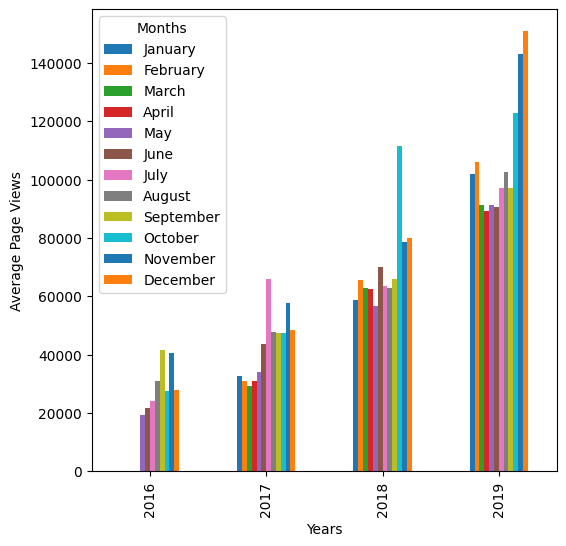

In [248]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
# It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of Months. 
# On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df.index.year
    df_bar['month'] = df.index.month_name()

    # Group and Reorganize
    df_bar_group = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar_group = df_bar_group.unstack(level='month')
    df_bar_group = df_bar_group[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

    # Draw bar plot
    fig = df_bar_group.plot.bar(figsize=(6,6)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months")

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    # return fig

draw_bar_plot()

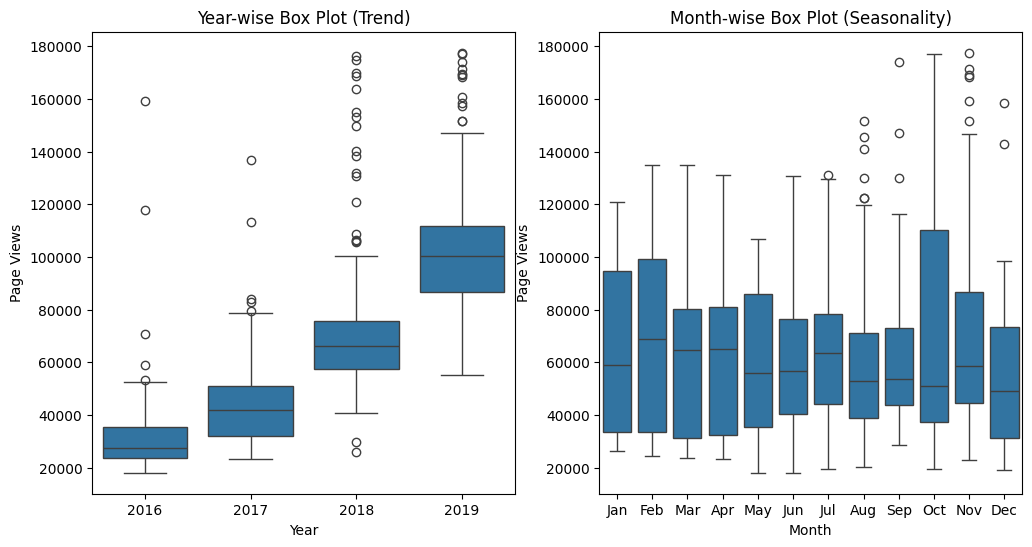

In [253]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". 
# These box plots should show how the values are distributed within a given year or month and how it compares over time. 
# The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). 
# Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    sns.boxplot(df_box, x='year', y='value', ax=ax1)
    sns.boxplot(df_box, x='month', y='value', ax=ax2, order = mon_order)

    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    # return fig

draw_box_plot()